In [1]:
import shutil
import os, sys
import numpy as np
import pandas as pd
from keras import models
import numpy as np
from tqdm import tqdm
import os
from datetime import datetime
from keras import models
import  argparse, yaml
from keras.preprocessing.image import ImageDataGenerator

2025-03-01 11:41:10.300514: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-01 11:41:10.300539: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-01 11:41:10.301281: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-01 11:41:10.305446: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-01 11:41:10.873469: W tensorflow/compiler/tf2

# Params

In [2]:
params={'bd_src':"/media/jczars/4C22F02A22F01B22/$WinREAgent/Pollen_classification_view/BD/CPD1_Cr_Rs_400/Test/k1",
        'path_labels' : "/media/jczars/4C22F02A22F01B22/$WinREAgent/Pollen_classification_view/BD/BI_Cr_5/labels/",
        'bd_dst':"/media/jczars/4C22F02A22F01B22/Pollen-Classification-CBAM/BD/CPD1_TEST_VIEW/k1/",
        'path_model':"/media/jczars/4C22F02A22F01B22/$WinREAgent/Pollen_classification_view/results/phase1/reports_cr/1_DenseNet201_sem_BI_5/models/1_DenseNet201_bestLoss_13.keras",
}

In [3]:
categories = sorted(os.listdir(params['bd_src']))
categories
for idx, i in enumerate(categories):
    print(idx, i)


0 asphodelus
1 calicotome
2 castanea
3 ceratonia
4 ebenus
5 erica
6 eucalyptus
7 ferula
8 myrtus
9 olea
10 origanum
11 oxalis
12 pinus
13 pistacia
14 salvia
15 satureja
16 sinapis
17 thymbra
18 urginea
19 vitis


In [4]:
categories_vistas = sorted(os.listdir(params['path_labels']))
for idx, i in enumerate(categories_vistas):
    print(idx, i)

0 equatorial_alongada
1 equatorial_circular
2 equatorial_eliptica
3 polar_circular
4 polar_triangular
5 polar_tricircular


# Cria a pasta se não existir

In [5]:
os.makedirs(params['bd_dst'], exist_ok=True)

# Load the model

In [6]:
model = models.load_model(params['path_model'], compile=False)  # Load the model from the path_model)
model.summary()  # Print model summary

2025-03-01 11:41:11.886718: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-01 11:41:11.913092: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-01 11:41:11.913208: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']      

# Lista categorias

In [7]:
cat_names = os.listdir(params['bd_src'])
for idx, i in enumerate(cat_names):
    print(idx, i)

0 asphodelus
1 calicotome
2 castanea
3 ceratonia
4 ebenus
5 erica
6 eucalyptus
7 ferula
8 myrtus
9 olea
10 origanum
11 oxalis
12 pinus
13 pistacia
14 salvia
15 satureja
16 sinapis
17 thymbra
18 urginea
19 vitis


In [8]:
data = pd.DataFrame(columns=['file', 'labels'])

In [9]:
c = 0
for j in tqdm(cat_names, desc="Processing categories"):
    pathfile = os.path.join(params['bd_src'], j)
    # Check if the path is a directory
    if not os.path.isdir(pathfile):
        print(f"Warning: {pathfile} is not a directory, skipping.")
        continue

    filenames = os.listdir(pathfile)
    for i in filenames:
        # Full file path
        file_path = os.path.join(pathfile, i)
        
        # Check if it's a valid file (e.g., image file)
        if os.path.isfile(file_path):
            data.loc[c] = [file_path, j]
            c += 1

Processing categories: 100%|██████████| 20/20 [00:00<00:00, 85.90it/s]


In [10]:
data

,file,labels
0,/media/jczars/4C22F02A22F01B22/$WinREAgent/Pol...,asphodelus
1,/media/jczars/4C22F02A22F01B22/$WinREAgent/Pol...,asphodelus
2,/media/jczars/4C22F02A22F01B22/$WinREAgent/Pol...,asphodelus
3,/media/jczars/4C22F02A22F01B22/$WinREAgent/Pol...,asphodelus
4,/media/jczars/4C22F02A22F01B22/$WinREAgent/Pol...,calicotome
...,...,...
398,/media/jczars/4C22F02A22F01B22/$WinREAgent/Pol...,vitis
399,/media/jczars/4C22F02A22F01B22/$WinREAgent/Pol...,vitis
400,/media/jczars/4C22F02A22F01B22/$WinREAgent/Pol...,vitis
401,/media/jczars/4C22F02A22F01B22/$WinREAgent/Pol...,vitis


In [11]:
_csv_data=f"{params['bd_dst']}data.csv"

In [12]:
data.to_csv(_csv_data, index=False, header=True)
print(f'\nCSV saved successfully at: {_csv_data}')


CSV saved successfully at: /media/jczars/4C22F02A22F01B22/Pollen-Classification-CBAM/BD/CPD1_TEST_VIEW/k1/data.csv


# Read and print summary from the CSV

In [13]:
data_csv = pd.read_csv(_csv_data)        
# Create and save the summary CSV with counts of images per label
_summary_csv = _csv_data.replace('.csv', '_summary.csv')
label_counts = data_csv.groupby('labels').size().reset_index(name='count')
label_counts.to_csv(_summary_csv, index=False, header=True)
print(data_csv.groupby('labels').count())

            file
labels          
asphodelus     4
calicotome    30
castanea      21
ceratonia     10
ebenus         3
erica         18
eucalyptus    17
ferula         8
myrtus        79
olea          79
origanum      17
oxalis        14
pinus          3
pistacia       3
salvia        18
satureja       7
sinapis       20
thymbra       14
urginea       11
vitis         27


In [14]:
def load_data_test(test_data, input_size):
  idg = ImageDataGenerator(rescale=1. / 255)
  test_data_generator = idg.flow_from_dataframe(test_data,
                                            x_col = "file",
                                            y_col = "labels",
                                            target_size=input_size,
                                            class_mode = "categorical",
                                            shuffle = False)
  return test_data_generator

In [15]:
input_shape=(224, 224)
batch_size=16

In [16]:
test_data_generator = load_data_test(data, input_shape) 

Found 403 validated image filenames belonging to 20 classes.


# Predict

In [17]:
filenames = test_data_generator.filenames
df = pd.DataFrame(filenames, columns=['file'])
nb_samples = len(filenames)
print('Predicting unlabeled data...', nb_samples)
print(f'Batch size: {batch_size}')

Predicting unlabeled data... 403
Batch size: 16


In [18]:
y_preds = model.predict(test_data_generator)
y_pred = np.argmax(y_preds, axis=1)
y_pred

2025-03-01 11:43:07.874696: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907


13/13 [==============================] - 5s 135ms/step


array([1, 3, 1, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 0, 0, 4, 4, 0, 0,
       0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [19]:
df['y_pred'] = y_pred

In [20]:
vistas = []   # List to store views
classes = []  # List to store classes

# Iterar sobre as linhas do DataFrame
for i, row in df.iterrows():
    # Access category prediction and file path
    vista = categories_vistas[row['y_pred']]  # Corrigido para acessar 'y_pred' da linha atual
    classe = row['file']

    # Extract the view ("EQUATORIAL" or "POLAR") and class from the file path
    vt = vista.split('_')[0]        
    classe = classe.split('/')[-2]    

    vistas.append(vt)
    classes.append(classe)

df['vista'] = vistas
df['classe'] = classes

# Group DataFrame by 'vista' and 'classe' and count the number of images per combination
quantidade_por_vista_classe = df.groupby(['vista', 'classe']).size().reset_index(name='quantidade')
quantidade_por_vista_classe

,vista,classe,quantidade
0,equatorial,asphodelus,2
1,equatorial,castanea,21
2,equatorial,ceratonia,10
3,equatorial,ebenus,3
4,equatorial,erica,1
5,equatorial,eucalyptus,1
6,equatorial,ferula,5
7,equatorial,olea,79
8,equatorial,origanum,12
9,equatorial,pistacia,3


# copy_images_by_vista

In [21]:
# Ensure the destination directories exist
equatorial_dir = os.path.join(params['bd_dst'], 'EQUATORIAL')
polar_dir = os.path.join(params['bd_dst'], 'POLAR')

In [22]:
os.makedirs(equatorial_dir, exist_ok=True)
os.makedirs(polar_dir, exist_ok=True)

In [23]:
# Iterate through the DataFrame and copy images based on the 'vista' column
for _, row in df.iterrows():
    # Get file path and vista from DataFrame
    file_path = row['file']  # full path of the image
    vista = row['vista']

    # Extract class from the file path (second-to-last directory in the path)
    class_name = file_path.split('/')[-2]  # Class is the second-to-last element in the path

    # Determine the destination folder based on vista
    if vista == 'equatorial':
        destination_folder = os.path.join(equatorial_dir, class_name)
    elif vista == 'polar':
        destination_folder = os.path.join(polar_dir, class_name)
    else:
        continue  # Skip if vista is not valid

    # Ensure the class subdirectory exists
    os.makedirs(destination_folder, exist_ok=True)

    # Determine the destination file path
    destination_path = os.path.join(destination_folder, os.path.basename(file_path))

    # Copy the image to the appropriate directory
    try:
        shutil.copy(file_path, destination_path)
        print(f"Copied {file_path} to {destination_path}")
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"Error copying {file_path}: {e}")

Copied /media/jczars/4C22F02A22F01B22/$WinREAgent/Pollen_classification_view/BD/CPD1_Cr_Rs_400/Test/k1/asphodelus/Asp.A.ramX400wF(1984)(0)A-10.png to /media/jczars/4C22F02A22F01B22/Pollen-Classification-CBAM/BD/CPD1_TEST_VIEW/k1/EQUATORIAL/asphodelus/Asp.A.ramX400wF(1984)(0)A-10.png
Copied /media/jczars/4C22F02A22F01B22/$WinREAgent/Pollen_classification_view/BD/CPD1_Cr_Rs_400/Test/k1/asphodelus/Asp.A.ramX400wF(1985)(0)B-2.png to /media/jczars/4C22F02A22F01B22/Pollen-Classification-CBAM/BD/CPD1_TEST_VIEW/k1/POLAR/asphodelus/Asp.A.ramX400wF(1985)(0)B-2.png
Copied /media/jczars/4C22F02A22F01B22/$WinREAgent/Pollen_classification_view/BD/CPD1_Cr_Rs_400/Test/k1/asphodelus/Asp.A.ramX400wF(1987)(0)D-1.png to /media/jczars/4C22F02A22F01B22/Pollen-Classification-CBAM/BD/CPD1_TEST_VIEW/k1/EQUATORIAL/asphodelus/Asp.A.ramX400wF(1987)(0)D-1.png
Copied /media/jczars/4C22F02A22F01B22/$WinREAgent/Pollen_classification_view/BD/CPD1_Cr_Rs_400/Test/k1/asphodelus/Asp.A.ramX400wF(1990)(0)G-2.png to /media/j

In [24]:
# Adiciona o diretório atual (pwd) ao PYTHONPATH
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))
# Import custom modules and functions
from models import get_data, utils, sound_test_finalizado

/media/jczars/4C22F02A22F01B22/Pollen-Classification-CBAM/models/utils.py:199: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(y=category_names, x=img_pr_cat, ax=ax, palette=palette)
/media/jczars/4C22F02A22F01B22/Pollen-Classification-CBAM/models/utils.py:199: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(y=category_names, x=img_pr_cat, ax=ax, palette=palette)


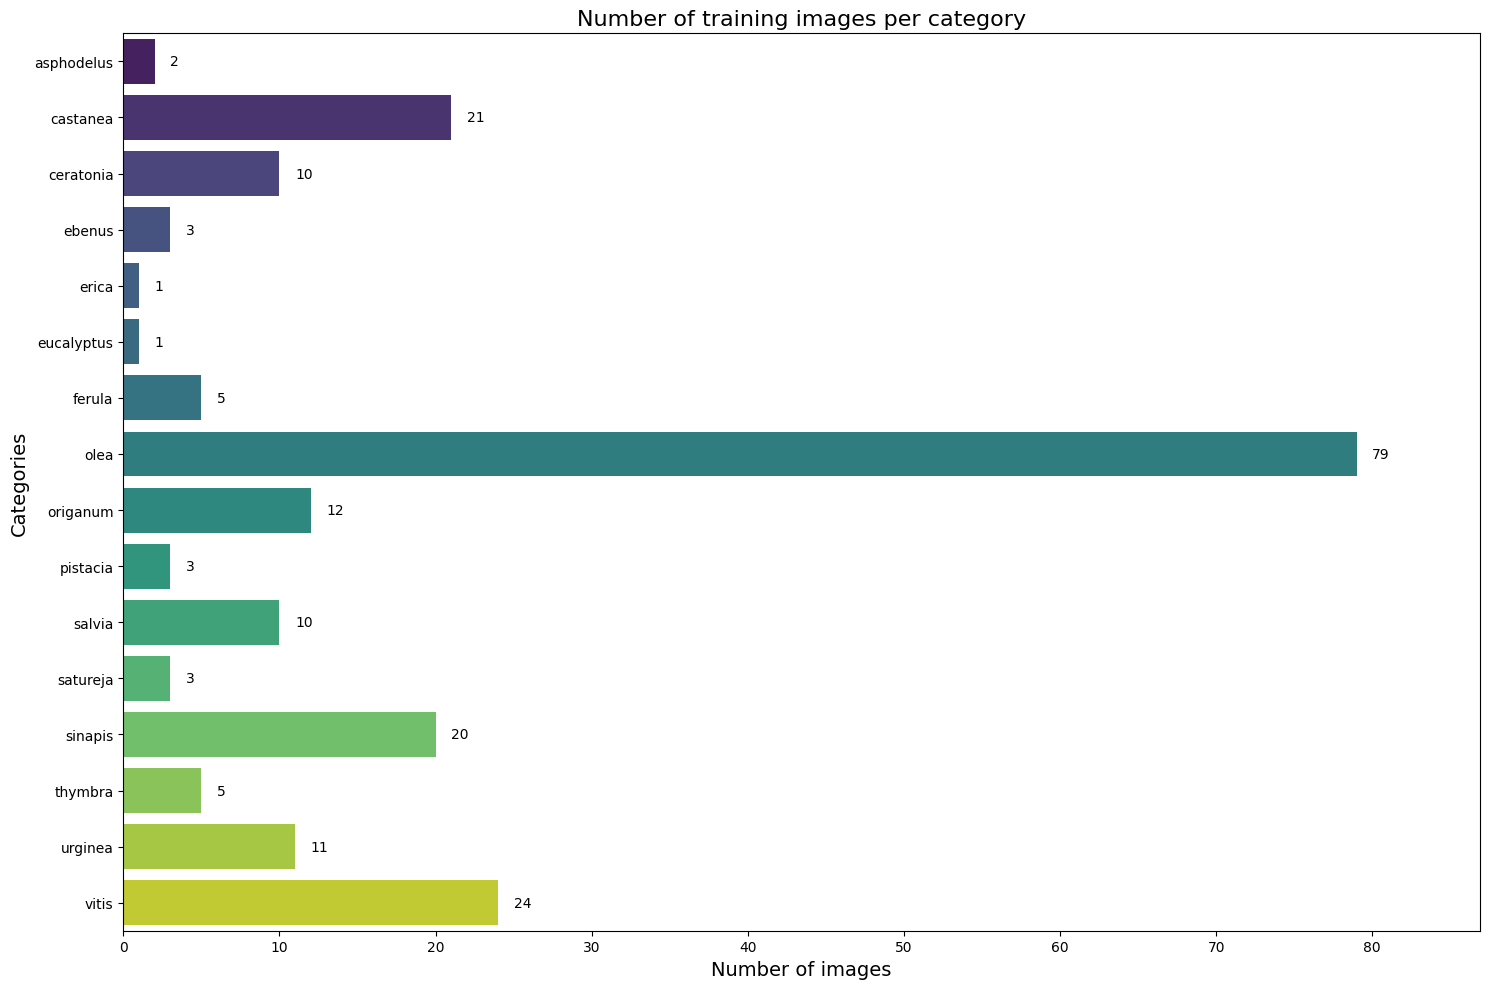

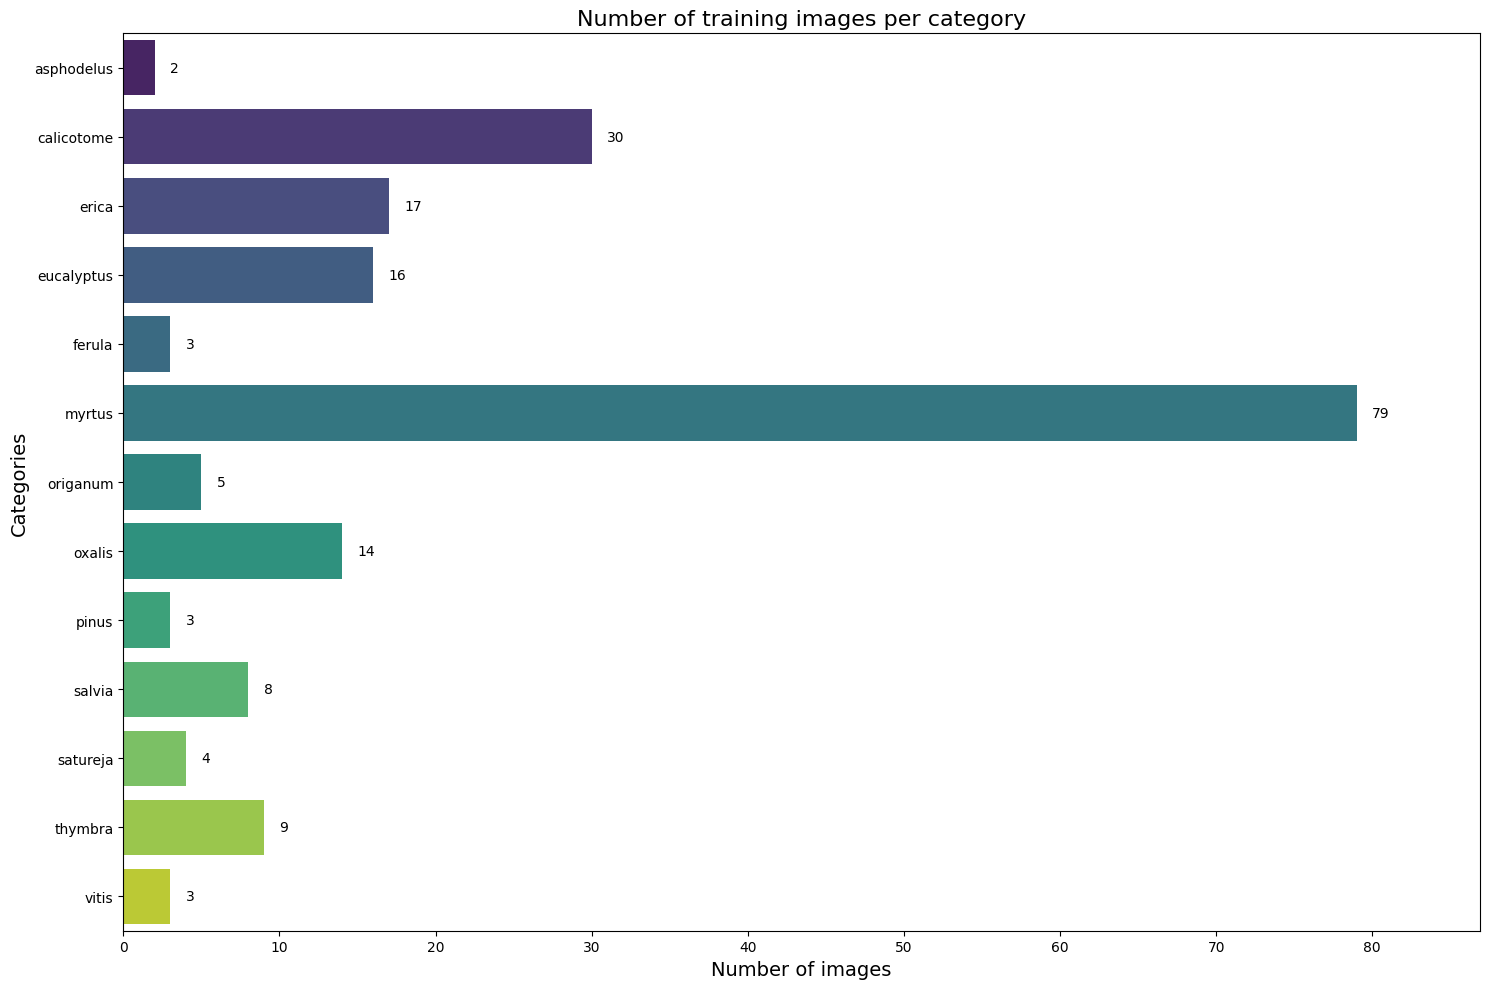

In [25]:
EQUATORIAL_dir = os.path.join(params['bd_dst'], 'EQUATORIAL')
POLAR_dir = os.path.join(params['bd_dst'], 'POLAR')

figEQ = utils.graph_img_cat(EQUATORIAL_dir)
figPL = utils.graph_img_cat(POLAR_dir)
save_dir = params['bd_dst']
if save_dir:
    figEQ.savefig(os.path.join(save_dir, 'img_cat_EQAUTORIAL.jpg'))
    figPL.savefig(os.path.join(save_dir, 'img_cat_POLAR.jpg'))